In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from sklearn.decomposition import PCA

- Attributes

- People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 - --otherwise
- Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month
- Target
- Need to perform clustering to summarize customer segments.

In [2]:
data=pd.read_csv('marketing_campaign.csv',delimiter='\t')
data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


# Cleaning the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#There are missing values in the data
#treating the missing values
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [6]:
data.isnull().sum().sum()

0

In [7]:
#No null values left

In [8]:
#Checking for datatype discrepency
#Dt_customer - is an object. - should be in datetime format
import datetime

In [9]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'],errors='coerce')

In [10]:
#creating a numerical column as number of days

In [11]:
max(data["Dt_Customer"])

Timestamp('2014-12-06 00:00:00')

In [12]:
days=[]
for i in data['Dt_Customer']:
    x=i.date()
    days.append(x)

In [13]:
print(max(days))

2014-12-06


In [14]:
print(min(days))

2012-01-08


In [15]:
#First customer enrolled in 2012

In [16]:
d=max(days)
cust=[]
for i in days:
    s=d-i
    cust.append(s)


In [17]:
data['Dt_Customer']=cust

In [18]:
data['Dt_Customer'].dtype

dtype('<m8[ns]')

In [19]:
data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,971 days 00:00:00,125 days 00:00:00,472 days 00:00:00,65 days 00:00:00,321 days 00:00:00
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


# Feature Engineering

In [20]:
#Checking the categorical variables
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [21]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [22]:
#Reducing the number of values in  the column
data['Education'].replace({'Graduation':'Graduation','PhD':'Post Graduation','Master':'Post Graduation','2n Cycle':'Under Graduation','Basic':'Under Graduation'},inplace=True)

In [23]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,971 days,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,125 days,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,472 days,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,65 days,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Post Graduation,Married,58293.0,1,0,321 days,94,173,...,5,0,0,0,0,0,0,3,11,0


In [24]:
data['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Single':'Single','Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'},inplace=True)

In [25]:
data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,Post Graduation
Marital_Status,Single,Single,Partner,Partner,Partner
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,971 days 00:00:00,125 days 00:00:00,472 days 00:00:00,65 days 00:00:00,321 days 00:00:00
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [26]:
#total amount spent by the customer
data['Spent']=data['MntFishProducts']+data['MntFruits']+data['MntGoldProds']+data['MntMeatProducts']+data['MntSweetProducts']+data['MntWines']

In [27]:
data['Kids']=data['Kidhome']+data['Teenhome']

In [28]:
data["Family_Members"] = data["Marital_Status"].replace({"Single": 1, "Partner":2})+ data["Kids"]

In [29]:
data['Parent'] = np.where(data['Kids']>0,1,0)

In [30]:
data['Age']=2022-data['Year_Birth']

In [31]:
#dropping redundant columns
data.drop(['ID','Year_Birth','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Education            2216 non-null   object         
 1   Marital_Status       2216 non-null   object         
 2   Income               2216 non-null   float64        
 3   Kidhome              2216 non-null   int64          
 4   Teenhome             2216 non-null   int64          
 5   Dt_Customer          2216 non-null   timedelta64[ns]
 6   Recency              2216 non-null   int64          
 7   MntWines             2216 non-null   int64          
 8   MntFruits            2216 non-null   int64          
 9   MntMeatProducts      2216 non-null   int64          
 10  MntFishProducts      2216 non-null   int64          
 11  MntSweetProducts     2216 non-null   int64          
 12  MntGoldProds         2216 non-null   int64          
 13  NumDealsPurchases 

In [33]:
data['Num_purchases']=data['NumCatalogPurchases']+data['NumDealsPurchases']+data['NumStorePurchases']+data['NumWebPurchases']

In [34]:
data['Customer_for']=pd.to_numeric(data['Dt_Customer'],errors='coerce')

In [35]:
data.drop(['Dt_Customer'],axis=1,inplace=True)

In [36]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Spent,Kids,Family_Members,Parent,Age,Num_purchases,Customer_for
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.013538,0.009477,0.150271,607.075361,0.947202,2.592509,0.714350,53.179603,14.880866,4.423735e+16
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.115588,0.096907,0.357417,602.900476,0.749062,0.905722,0.451825,11.985554,7.670957,2.008532e+16
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,26.000000,0.000000,0.000000e+00
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,69.000000,0.000000,2.000000,0.000000,45.000000,8.000000,2.937600e+16
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,396.500000,1.000000,3.000000,1.000000,52.000000,15.000000,4.432320e+16
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,1048.000000,1.000000,3.000000,1.000000,63.000000,21.000000,5.927040e+16
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,2525.000000,3.000000,5.000000,1.000000,129.000000,44.000000,9.184320e+16


<AxesSubplot: >

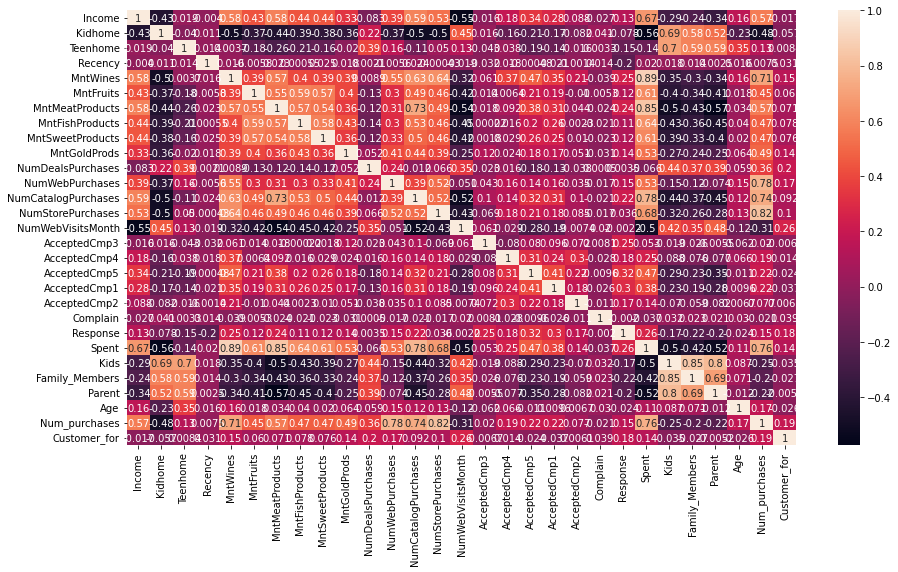

In [37]:
#Outliers and visualization
plt.figure(figsize=[15,8])
sns.heatmap(data.corr(),annot=True)

In [38]:
df_num=data.select_dtypes(include=np.number)

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


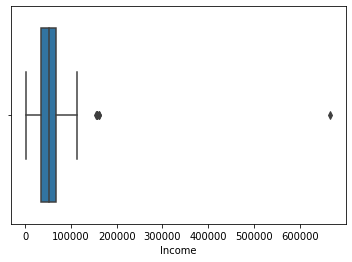

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


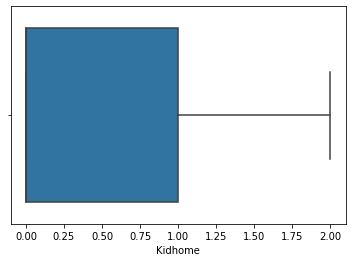

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


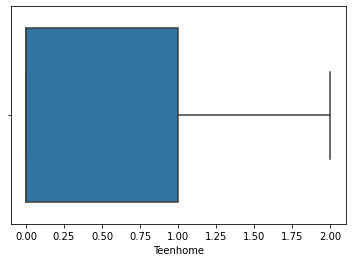

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


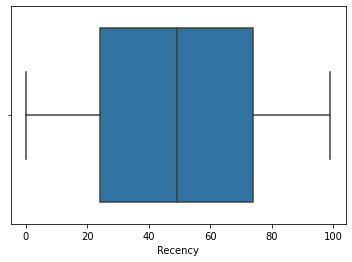

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


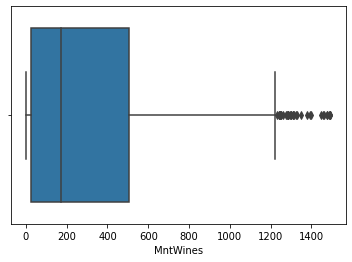

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


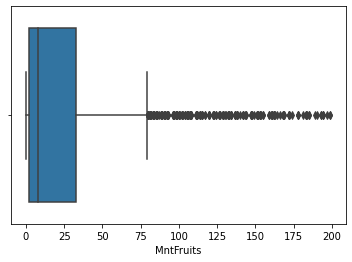

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


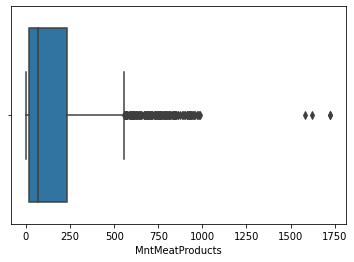

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


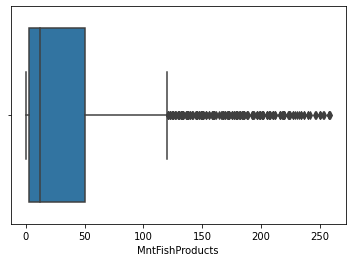

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


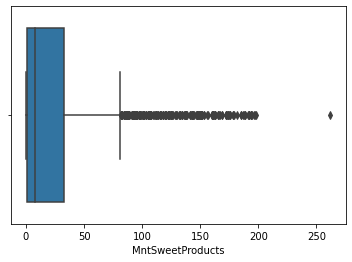

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


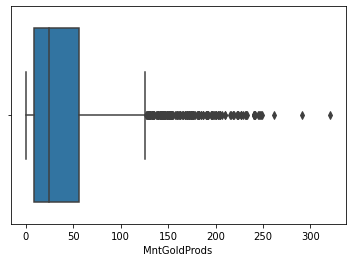

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


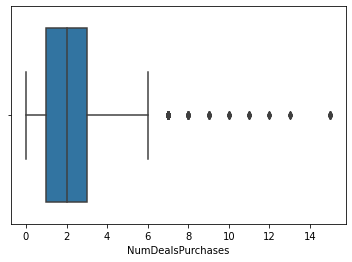

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


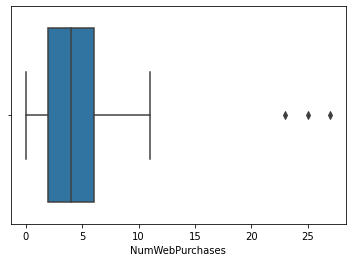

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


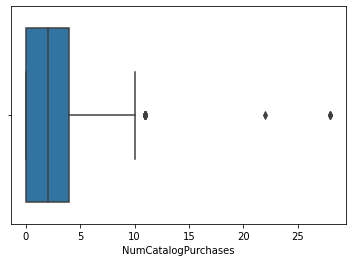

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


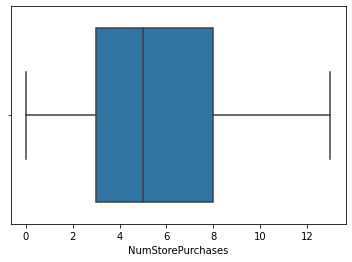

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


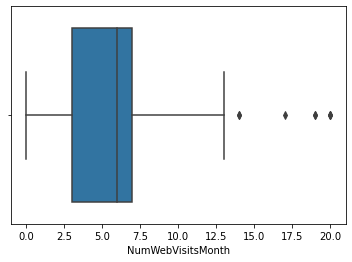

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


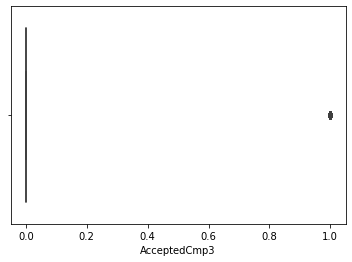

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


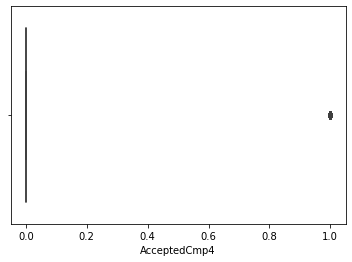

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


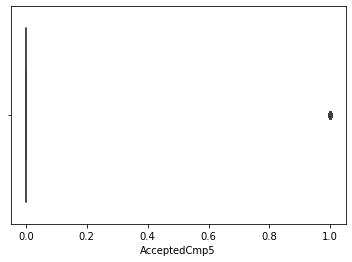

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


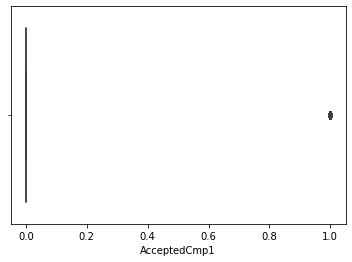

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


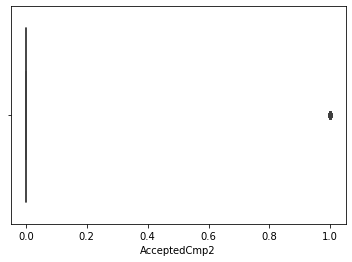

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


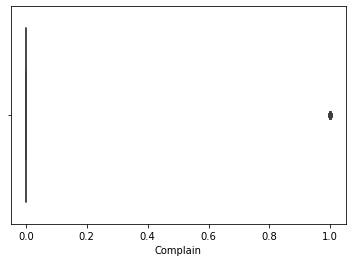

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


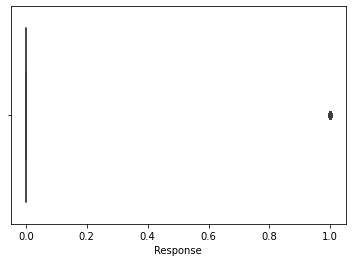

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


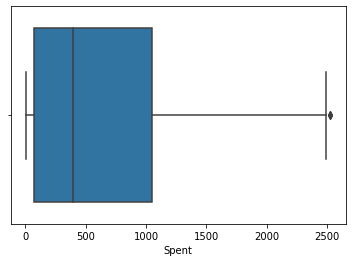

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


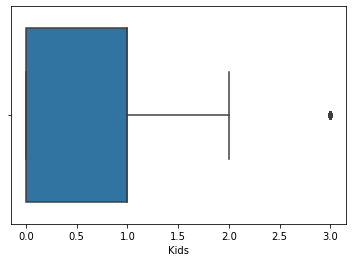

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


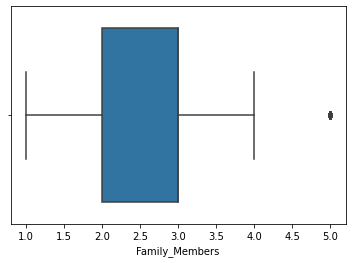

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


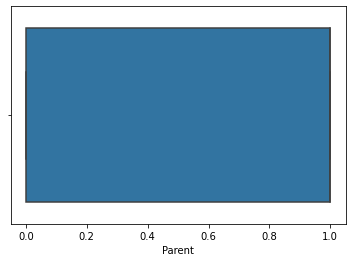

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


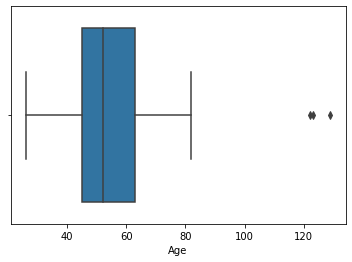

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


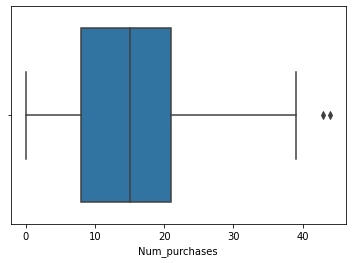

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


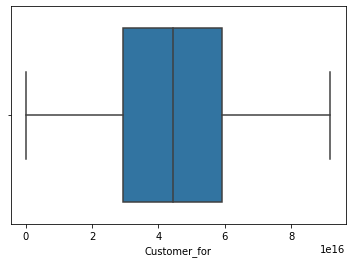

In [39]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [40]:
q1=data.quantile(0.05)
q3=data.quantile(0.95)
iqr=q3-q1
data=data[~((data<q1-(1.5*iqr)) | (data>q3+(1.5*iqr))).any(axis=1)]
data.shape

/var/folders/q3/7y2k2_t90hlgr_kg1ld6f41m0000gn/T/ipykernel_17112/3342160526.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=data[~((data<q1-(1.5*iqr)) | (data>q3+(1.5*iqr))).any(axis=1)]


(2151, 31)

In [41]:
#sns.pairplot(data,diag_kind='kde')

# Preprocessing

In [42]:
data['Marital_Status']=pd.get_dummies(data['Marital_Status'],drop_first=True)

In [43]:
df=data.copy()

In [44]:
df[['Post_grad_edu','under_grad_edu']]=pd.get_dummies(data['Education'],drop_first=True)

In [45]:
df.head().T

,0,1,2,3,4
Education,Graduation,Graduation,Graduation,Graduation,Post Graduation
Marital_Status,1,1,0,0,0
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Recency,58,38,26,26,94
MntWines,635,11,426,11,173
MntFruits,88,1,49,4,43
MntMeatProducts,546,6,127,20,118
MntFishProducts,172,2,111,10,46


In [46]:
df.drop(['Marital_Status'],axis=1,inplace=True)

In [47]:
df.drop(['Education'],axis=1,inplace=True)

In [48]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
ds=s.fit_transform(df)
scaled=pd.DataFrame(ds,columns=df.columns)

In [49]:
scaled.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Spent,Kids,Family_Members,Parent,Age,Num_purchases,Customer_for,Post_grad_edu,under_grad_edu
0,0.304569,-0.828674,-0.931911,0.311951,1.019253,1.536044,1.773405,2.434729,1.489330,0.863152,...,2.436947,1.701700,-1.273554,-1.768065,-1.596717,0.998790,1.350420,1.978625,-0.788003,-0.360176
1,-0.258599,1.031950,0.910498,-0.380022,-0.877600,-0.638466,-0.734843,-0.651601,-0.637146,-0.736257,...,-0.410350,-0.956566,1.404271,0.446908,0.626285,1.251334,-1.157889,-1.659026,-0.788003,-0.360176
2,0.948006,-0.828674,-0.931911,-0.795206,0.383929,0.561264,-0.172809,1.327281,-0.148301,-0.034077,...,-0.410350,0.295661,-1.273554,-0.660579,-1.596717,0.325338,0.822355,-0.166987,-0.788003,-0.360176
3,-1.199187,1.031950,-0.931911,-0.795206,-0.877600,-0.563483,-0.669814,-0.506362,-0.588262,-0.755762,...,-0.410350,-0.913097,0.065358,0.446908,0.626285,-1.274111,-0.893856,-1.917016,-0.788003,-0.360176
4,0.311971,1.031950,-0.931911,1.557501,-0.385148,0.411297,-0.214614,0.147214,-0.001648,-0.560712,...,-0.410350,-0.296179,0.065358,0.446908,0.626285,-1.021567,0.558323,-0.816261,1.269030,-0.360176


# Applying PCA

In [50]:
#Finding the right number of components
cov_mat=np.cov(scaled.T)
print(cov_mat[0:5])

[[ 1.00046512e+00 -5.21623764e-01  4.81988590e-02  9.78466547e-03
   7.15422465e-01  5.25338332e-01  7.00747928e-01  5.38835877e-01
   5.36362396e-01  4.19029558e-01 -1.20251917e-01  5.02505195e-01
   7.08659762e-01  6.55485624e-01 -6.63558442e-01 -2.09367606e-02
   2.06932418e-01  3.91666724e-01  3.24417665e-01  0.00000000e+00
   0.00000000e+00  1.49651340e-01  8.03061677e-01 -3.40335720e-01
  -2.84637219e-01 -4.02888673e-01  2.15835915e-01  6.79018399e-01
  -3.16843257e-02  1.04713595e-01 -1.74540585e-01]
 [-5.21623764e-01  1.00046512e+00 -4.39540087e-02  1.28626731e-02
  -4.98855053e-01 -3.79341922e-01 -4.57073470e-01 -3.94100046e-01
  -3.83168410e-01 -3.60630844e-01  2.34211813e-01 -3.86346967e-01
  -5.33813994e-01 -5.07039463e-01  4.68538115e-01  1.29882321e-02
  -1.43740149e-01 -1.94370654e-01 -1.65668619e-01  0.00000000e+00
   0.00000000e+00 -6.66925110e-02 -5.57667071e-01  6.87996842e-01
   5.84241872e-01  5.19227454e-01 -2.44605561e-01 -4.85830432e-01
  -5.87552818e-02 -2.6681

In [51]:
eig_val,eig_vec=np.linalg.eig(cov_mat)
print('eigen_value\n',eig_val)
print('eigen_vector\n',eig_vec)

eigen_value
 [ 9.48997679e+00  3.36782551e+00  1.75670279e+00  1.72919096e+00
  1.34686800e+00  1.19082088e+00  1.05187727e+00  9.96689521e-01
  8.83218991e-01  7.46923515e-01  1.30146313e-01  1.65498725e-01
  6.92630154e-01  2.05359451e-01  2.42483951e-01  2.80205211e-01
  2.83218253e-01  3.56640481e-01  3.69472615e-01  4.11266996e-01
  4.51409038e-01  6.26521632e-01  6.05445550e-01  5.18265662e-01
  5.43403279e-01  5.71426846e-01 -4.20441958e-16  1.44165758e-17
  5.84661533e-16  0.00000000e+00  0.00000000e+00]
eigen_vector
 [[-2.68059026e-01 -1.15354720e-01  1.88393486e-01  5.90739514e-02
   1.36073886e-01  2.15332161e-02 -5.82172769e-03 -4.08775034e-02
  -5.81365695e-03 -5.75357168e-02 -6.38220773e-01 -2.50589458e-01
  -9.22438669e-02 -1.67440212e-01  3.99075771e-01  3.38467285e-01
  -1.29553213e-01 -7.21027397e-02  1.06510257e-01 -3.41805233e-02
  -1.32153137e-01  4.40564993e-02  4.30313475e-02 -6.14462327e-02
  -1.06253126e-01  2.28336260e-02 -1.44005656e-16  1.98590255e-16
   2.9

In [52]:
eigen_values=list(eig_val)
eigen_values.sort(reverse=True)

In [53]:
eigen_values

[9.48997678794542,
 3.3678255109197264,
 1.7567027852491506,
 1.7291909571926412,
 1.3468679999746591,
 1.1908208771713518,
 1.0518772683010902,
 0.9966895208068394,
 0.8832189909137322,
 0.746923515337813,
 0.6926301542467437,
 0.6265216324628954,
 0.6054455496448441,
 0.5714268461335141,
 0.5434032793551066,
 0.5182656618458452,
 0.4514090383240817,
 0.4112669964515463,
 0.36947261493335876,
 0.35664048068138116,
 0.2832182531035004,
 0.28020521128799447,
 0.24248395136177783,
 0.20535945131219013,
 0.16549872457758888,
 0.13014631255825462,
 5.846615328422763e-16,
 1.4416575759674132e-17,
 0.0,
 0.0,
 -4.2044195788027545e-16]

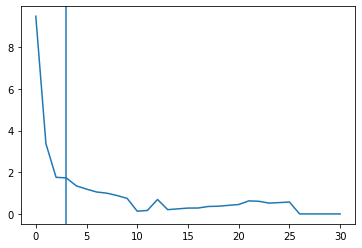

In [54]:
plt.plot(eig_val)
plt.axvline(3)

In [55]:
# 3 could be a good number of components

In [56]:
#Considering 3 components
pca=PCA(n_components=3,random_state=1)
components=pca.fit_transform(scaled)

In [57]:
df_pca=pd.DataFrame(components,columns=['PC1','PC2','PC3'])
df_pca.head()

,PC1,PC2,PC3
0,5.212761,-0.218896,2.608006
1,-3.202091,-0.033850,-1.784220
2,2.549040,-0.801331,-0.434276
3,-2.962366,-1.528927,-0.204164
4,-0.518047,0.666345,-0.245845


In [58]:
df_pca.shape

(2151, 3)

In [59]:
#Reduced number of dimensions

In [60]:
#Forming the clusters

In [61]:
wcss=[]
for i in range(1,11):
    kms=KMeans(n_clusters=i,random_state=2)
    kms.fit(df_pca)
    wcss.append(kms.inertia_)

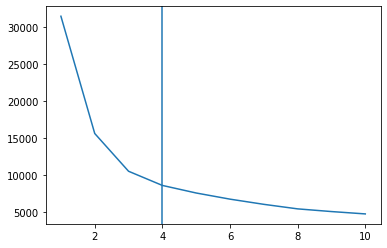

In [62]:
plt.plot(range(1,11),wcss)
plt.axvline(4)

In [63]:
#Considering 3 clusters for our model

In [64]:
model_1=AgglomerativeClustering(n_clusters=4)
model_1.fit(df_pca)

AgglomerativeClustering(n_clusters=4)

In [65]:
df_pca['cluster']=model_1.labels_

In [66]:
#For the original dataframe
data['cluster']=model_1.labels_

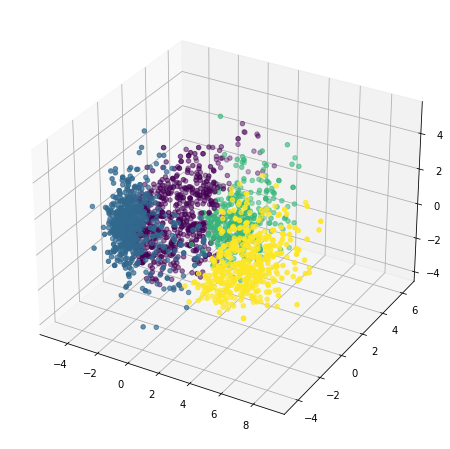

In [67]:
plt.figure(figsize=[15,8])
ax=plt.axes(projection='3d')
ax.scatter3D(df_pca['PC1'],df_pca['PC2'],df_pca['PC3'],c=df_pca['cluster'])

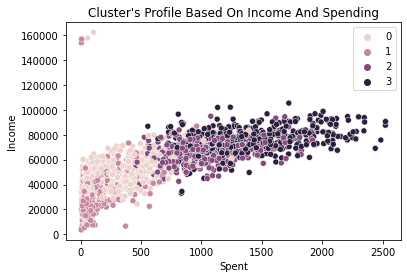

In [68]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='cluster', ylabel='Num_purchases'>

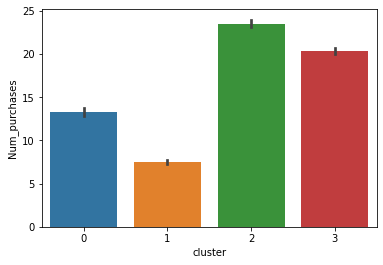

In [69]:
#Purchasing habits
sns.barplot(data['cluster'],data['Num_purchases'])

In [70]:
#Highest number of purchases made by people of avg income group
# naturally as they have a tendency of spending more.

# Profiling 

In [71]:
# taking data["Spent"] on the y axis against all necessary columns

In [72]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Spent', 'Kids', 'Family_Members', 'Parent',
       'Age', 'Num_purchases', 'Customer_for', 'cluster'],
      dtype='object')

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Education', ylabel='Spent'>

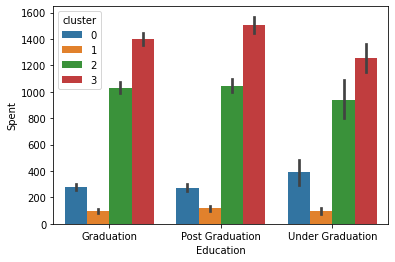

In [73]:
sns.barplot(data['Education'],data['Spent'],hue=data['cluster'])

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Kidhome', ylabel='Spent'>

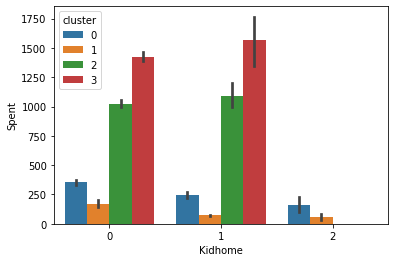

In [74]:
sns.barplot(data['Kidhome'],data['Spent'],hue=data['cluster'])

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Teenhome', ylabel='Spent'>

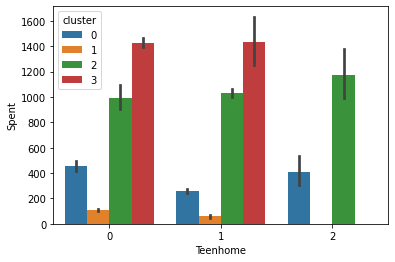

In [75]:
sns.barplot(data['Teenhome'],data['Spent'],hue=data['cluster'])

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


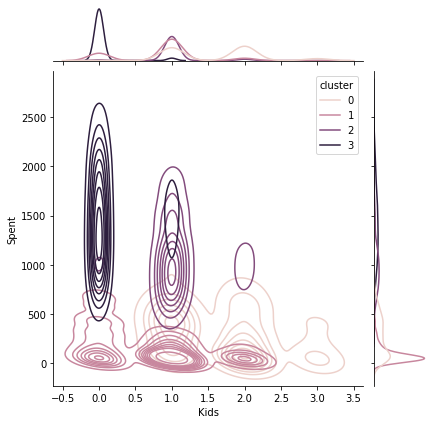

In [76]:
sns.jointplot(data['Kids'],data['Spent'],hue=data['cluster'],kind='kde')

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


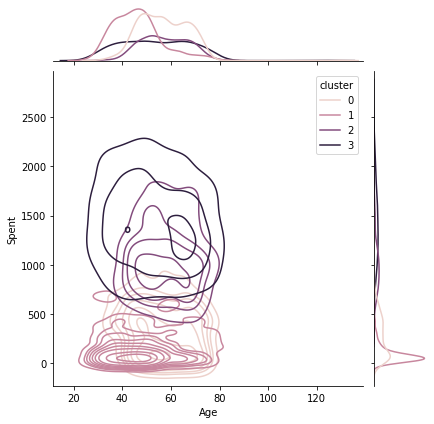

In [77]:
sns.jointplot(data['Age'],data['Spent'],hue=data['cluster'],kind='kde')

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Customer_for', ylabel='Spent'>

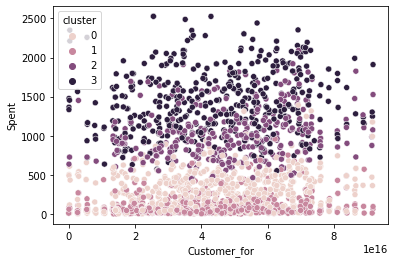

In [78]:
sns.scatterplot(data['Customer_for'],data['Spent'],hue=data['cluster'])

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


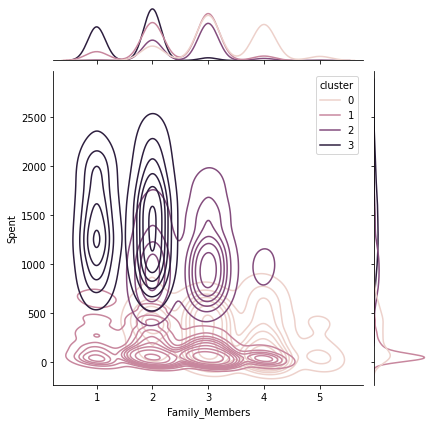

In [79]:
sns.jointplot(data['Family_Members'],data['Spent'],hue=data['cluster'],kind='kde')

/Users/ujjwalkohli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


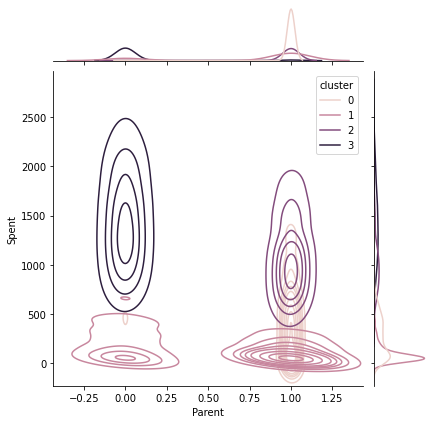

In [80]:
sns.jointplot(data['Parent'],data['Spent'],hue=data['cluster'],kind='kde')

- Inferences
- CLUSTER 0
  - Average income low spending group.
  - Consists of parents.
  - 2-5 poeple in a family.

- CLUSTER 1
  - Low spending low income group
  - Least number of purchases made by this group
  - No family has 2 teenagers in this group
  - Maximum of 2 children in the family
  - 1-4 family members

- CLUSTER 2
  - Average income high spending group.
  - Maximum number of purchases made by this group.
  - Relatively older group of poeple.
  - Majority of families have 1 child in this group.
  - 2-3 family members.

- CLUSTER 3
  - High spending high income group
  - No to 1 child families in the group.
  - 1-2 member family in the group.